In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


import sys
sys.path.append('../src')

%matplotlib inline
plt.style.use('ggplot')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 20,10

## Testing the Marcenko-Pastur Theorem

All the procedures are defined in the src.data.clean package.

In [2]:
from src.data.clean import *

/Users/aennassiri/anaconda3/envs/Research/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
x = np.random.normal(size=(10000, 1000))
eval0, _ = get_pca(np.corrcoef(x, rowvar=False))
mp = MarcenkoPastur(points=1000)
pdf0 = mp.pdf(var=1., q=x.shape[0]/float(x.shape[1]))
pdf1 = fit_kde(np.diag(eval0), bandwidth=0.01, x=pdf0.index.values.reshape(-1, 1))

Text(0.5, 1.0, 'A visualization of the Marcenko-Pastur Theorem')

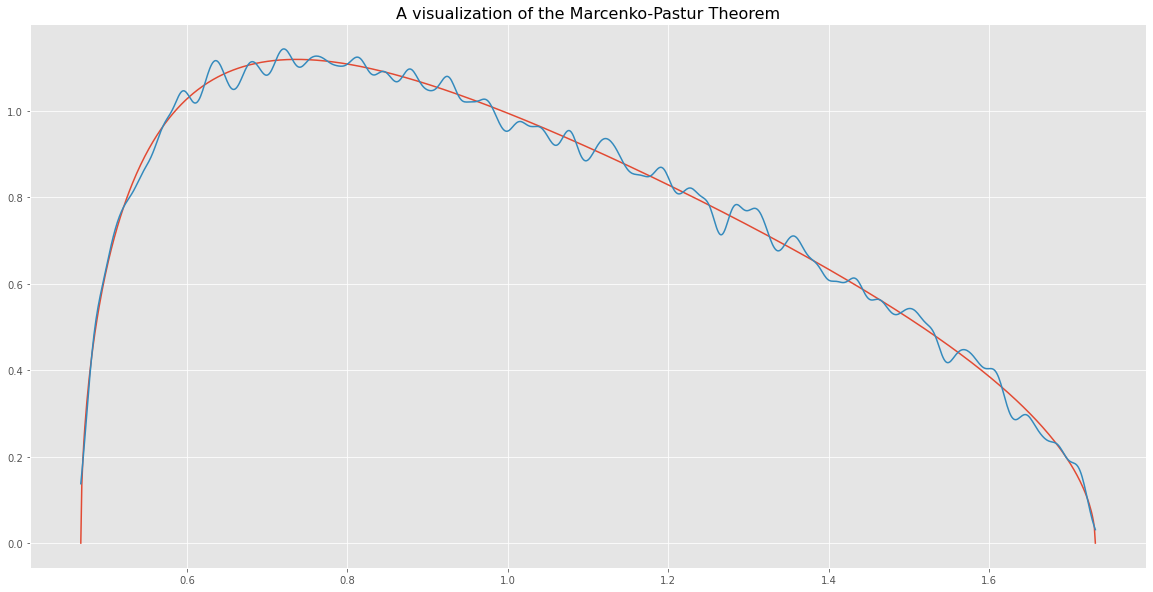

In [4]:
plt.plot(pdf0.index.values, pdf0)
plt.plot(pdf0.index.values, pdf1)
plt.title('A visualization of the Marcenko-Pastur Theorem', fontsize=16)

### Comments:

## Fitting the Marcenko-Pastur Distribution

In [5]:
from src.testing.fixtures import CorrelationFactory

alpha = 0.995
columns_number = 1000
facts_number = 100
q = 10

cf = CorrelationFactory(n_cols=columns_number)

covariance = np.cov(np.random.normal(size=(columns_number*q, columns_number)), rowvar=False)
covariance = alpha*covariance + (1-alpha)*cf.get_rnd_covariance(facts_number=facts_number)

corr0 = cf.cov2corr(covariance)
eval0, evec0 = get_pca(corr0)

mp = MarcenkoPastur()
emax0, var0 = mp.fit(np.diag(eval0), q, bandwidth=0.01)
facts_number0 = eval0.shape[0] - np.diag(eval0)[::-1].searchsorted(emax0)

This method helps us discriminate between eigenvalues associated with noise components and eigenvalues associated
with signal components.

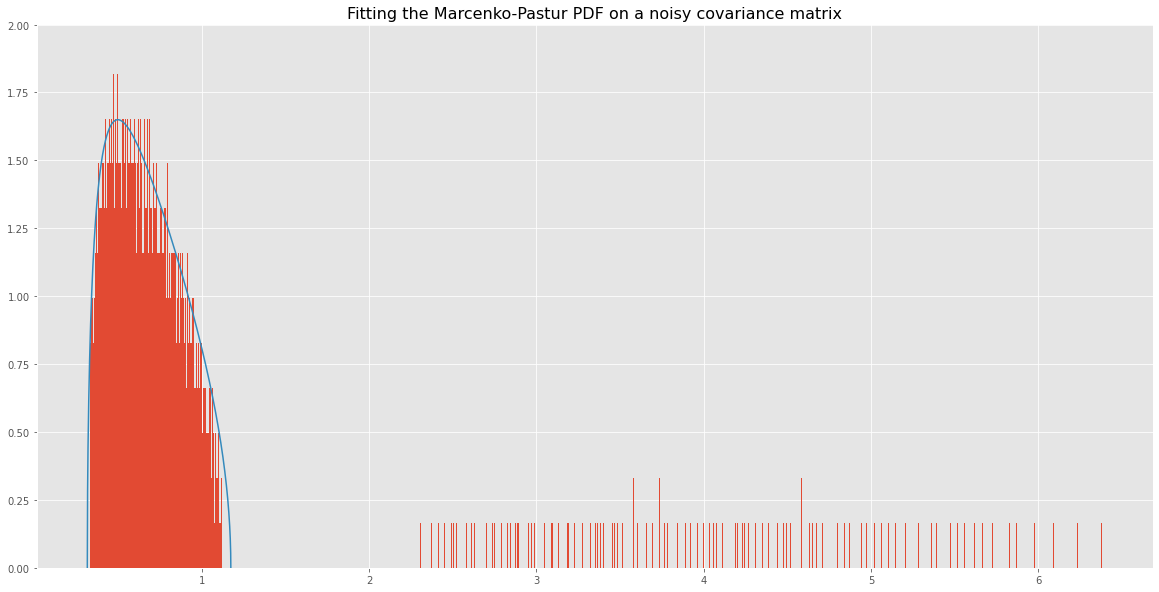

In [6]:
pdf0 = mp.pdf(var=var0, q=q)
nn, bb, patches=plt.hist(eval0.diagonal(),
                         bins=1000,
                         density=True)
plt.plot(pdf0.index.values, pdf0)
plt.title('Fitting the Marcenko-Pastur PDF on a noisy covariance matrix', fontsize=16)

plt.ylim(top=nn[1:].max() * 1.1)
plt.show()

## Denoising

### Denoising with the constant residual eigen value method

In [7]:
# Reusing the same results from before
corr = mp.denoise(eval0, evec0)
eval1, evec1 = get_pca(corr)

Text(0.5, 1.0, 'A visualization of the Marcenko-Pastur Theorem')

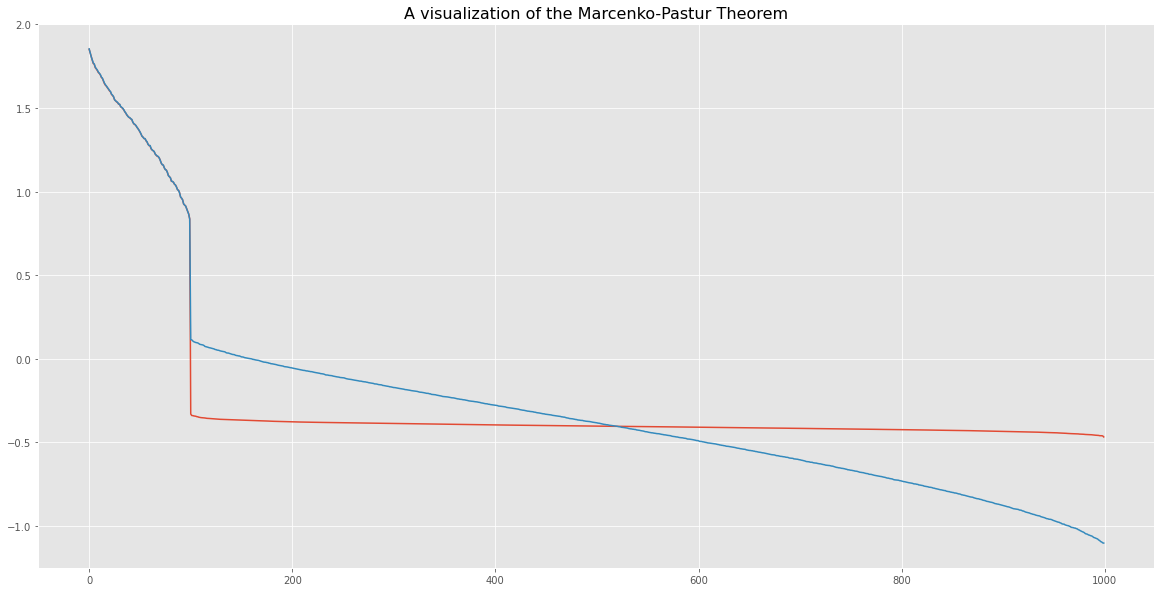

In [8]:
plt.plot(np.log(eval1.diagonal()))
plt.plot(np.log(eval0.diagonal()))


plt.title('A visualization of the Marcenko-Pastur Theorem', fontsize=16)


### Denoising with the shrinkage method

Text(0.5, 1.0, 'A visualization of the Marcenko-Pastur Theorem')

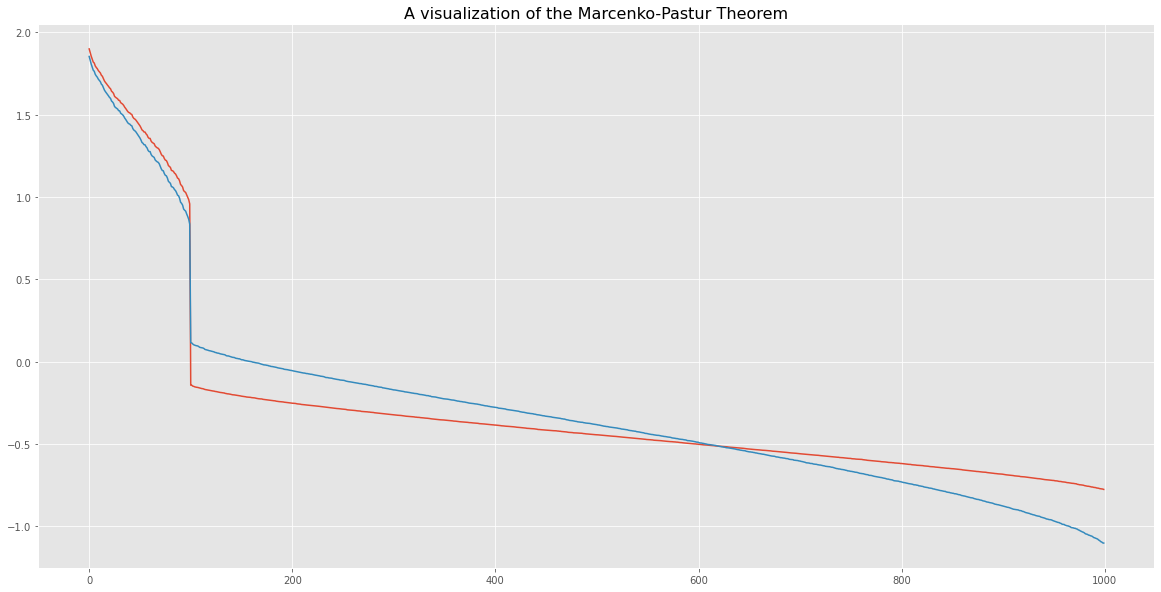

In [10]:
corr = mp.denoise(eval0, evec0, method="shrink", alpha=0.5)
eval2, evec2 = get_pca(corr)

plt.plot(np.log(eval2.diagonal()))
plt.plot(np.log(eval0.diagonal()))
plt.title('A visualization of the Marcenko-Pastur Theorem', fontsize=16)